In [47]:
import numpy as np
from triqs_tprf.tight_binding import TBLattice
import triqs_tprf as trpf
from pytriqs.gf import *
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

t = 1.0
H = TBLattice(
    units = [(1, 0, 0), (0, 1, 0)],
    hopping = {
        # nearest neighbour hopping -t
        ( 0,+1): -t * np.eye(2),
        ( 0,-1): -t * np.eye(2),
        (+1, 0): -t * np.eye(2),
        (-1, 0): -t * np.eye(2),
        },
    orbital_positions = [(0,0,0)]*2,
    orbital_names = ['up', 'do'],
    )

In [48]:
e_k = H.on_mesh_brillouin_zone(n_k = (32, 32, 1))


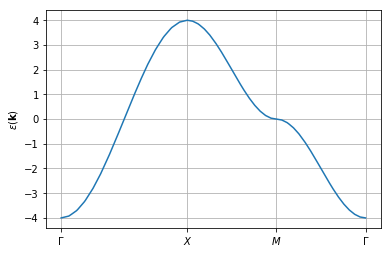

In [49]:
G = np.array([0.0, 0.0, 0.0]) * 2.*np.pi
X = np.array([0.5, 0.5, 0.0]) * 2.*np.pi
M = np.array([0.5, 0.0, 0.0]) * 2.*np.pi

paths = [(G, X), (X, M), (M, G)]

from triqs_tprf.lattice_utils import k_space_path
k_vecs, k_plot, K_plot = k_space_path(paths)
kx, ky, kz = k_vecs.T
e_k_interp = np.vectorize(
    lambda kx, ky, kz : e_k([kx, ky, kz])[0, 0].real)
e_k_interp = e_k_interp(kx, ky, kz)

plt.plot(k_plot, e_k_interp, '-')
plt.axes().set_xticks(K_plot)
plt.axes().set_xticklabels([r'$\Gamma$',r'$X$',r'$M$',r'$\Gamma$'])
plt.ylabel(r'$\epsilon(\mathbf{k})$'); plt.grid()

In [50]:
from pytriqs.gf import Gf
from pytriqs.gf import Gf, MeshImFreq, Fourier, LegendreToMatsubara, BlockGf, inverse, Idx
from triqs_tprf.lattice import lattice_dyson_g0_wk

In [51]:
wmesh = MeshImFreq(beta=5.0, S='Fermion', n_max=30)
g0_wk = lattice_dyson_g0_wk(mu=0., e_k=e_k, mesh=wmesh)

In [73]:
# g_pade = GfReFreq(window = (-7,7),n_points = 200,target_shape=(1,1))
g_r = GfReFreq(indices=[0], window=[-4,4])
# g_r.set_from_pade(g0_wk[(0,0)])
g0_wk[(0,0)].mesh

MeshProduct of :Matsubara Freq Mesh of size 60, Domain: Matsubara domain with beta = 5, statistic = Fermion, positive_only : 0, Brillouin Zone Mesh with linear dimensions (32 32 1)
 -- units = 
[[0.19635,0,0]
 [0,0.19635,0]
 [0,0,6.28319]]
 -- periodization_matrix = 
[[32,0,0]
 [0,32,0]
 [0,0,1]]
 -- Domain: Brillouin Zone with dimension 2, reciprocal matrix 
[[6.28319,0,0]
 [0,6.28319,0]
 [0,0,6.28319]]

In [87]:
g0_wk.mesh

MeshProduct of :Matsubara Freq Mesh of size 60, Domain: Matsubara domain with beta = 5, statistic = Fermion, positive_only : 0, Brillouin Zone Mesh with linear dimensions (32 32 1)
 -- units = 
[[0.19635,0,0]
 [0,0.19635,0]
 [0,0,6.28319]]
 -- periodization_matrix = 
[[32,0,0]
 [0,32,0]
 [0,0,1]]
 -- Domain: Brillouin Zone with dimension 2, reciprocal matrix 
[[6.28319,0,0]
 [0,6.28319,0]
 [0,0,6.28319]]

In [88]:
g_r.mesh

MeshProduct of :Linear Mesh of size 201, Brillouin Zone Mesh with linear dimensions (32 32 1)
 -- units = 
[[0.19635,0,0]
 [0,0.19635,0]
 [0,0,6.28319]]
 -- periodization_matrix = 
[[32,0,0]
 [0,32,0]
 [0,0,1]]
 -- Domain: Brillouin Zone with dimension 2, reciprocal matrix 
[[6.28319,0,0]
 [0,6.28319,0]
 [0,0,6.28319]]

In [90]:
rmesh = MeshReFreq(omega_min=-5,omega_max=5,n_max=201)
prodmesh = MeshProduct(rmesh,H.get_kmesh(n_k = (32, 32, 1)))
g_r = GfReFreq(indices=[0], mesh=prodmesh)
g_r.set_from_pade(g0_wk[(0,0)])

TypeError: Error: no suitable C++ overload found in implementation of function gf_fnt.set_from_pade

set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void 
 failed with the error : 
  Cpp2py converter: Python to C++ :
  ... Conversion of a gf from Python to C++ triqs::gfs::gf_view<triqs::gfs::refreq, triqs::gfs::matrix_valued>
  ... Cannot convert the mesh of gf from Python type :  MeshProduct to the C++ type triqs::gfs::gf_mesh<triqs::gfs::refreq>

set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void 
 failed with the error : 
  Cpp2py converter: Python to C++ :
  ... Conversion of a gf from Python to C++ triqs::gfs::gf_view<triqs::gfs::refreq, triqs::gfs::matrix_valued>
  ... Cannot convert the mesh of gf from Python type :  MeshProduct to the C++ type triqs::gfs::gf_mesh<triqs::gfs::refreq>

set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void 
 failed with the error : 
  Cpp2py converter: Python to C++ :
  ... Conversion of a gf from Python to C++ triqs::gfs::gf_view<triqs::gfs::refreq, triqs::gfs::matrix_valued>
  ... Cannot convert the mesh of gf from Python type :  MeshProduct to the C++ type triqs::gfs::gf_mesh<triqs::gfs::refreq>

set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void 
 failed with the error : 
  Cpp2py converter: Python to C++ :
  ... Conversion of a gf from Python to C++ triqs::gfs::gf_view<triqs::gfs::refreq, triqs::gfs::matrix_valued>
  ... Cannot convert the mesh of gf from Python type :  MeshProduct to the C++ type triqs::gfs::gf_mesh<triqs::gfs::refreq>


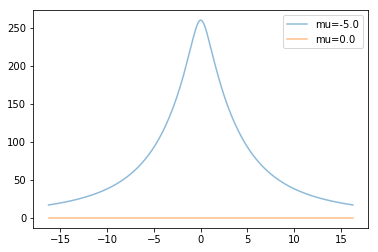

In [131]:
beta=50;n_iw=130;mu=0.1
for mu in np.linspace(-5,0,2):
    imesh=MeshImFreq(beta, 'Fermion', n_iw)
    g=lattice_dyson_g0_wk(mu, e_k,imesh)
    x=[i*1j for i in imesh.values()]
    plt.plot(x,-1*g[(0,0)].data.sum(axis=1).real,label="mu={}".format(mu),alpha=0.5)
plt.legend()
plt.show()

In [132]:
import pytriqs as pytriqs
G12=g.data
p=np.einsum('ijkl,ijab->ijklab',G12,G12)
args={
   "mesh":g.mesh,
    "data":p,
#     "target_shape":(2,2,2,2),
    "name":"P"
}
P=pytriqs.gf.Gf(**args)

In [133]:
V=Gf(mesh=e_k.mesh, target_shape=[2, 2,2,2])
V.data[:,0,0,0,0]=-2#1/(np.linalg.norm(np.array([i for i in e_k.mesh.values()]),axis=1)**2-1e-3j)
V.data[:,1,1,1,1]=-2#1/(np.linalg.norm(np.array([i for i in e_k.mesh.values()]),axis=1)**2-1e-3j)
w=trpf.lattice.dynamical_screened_interaction_W_wk(P,V)

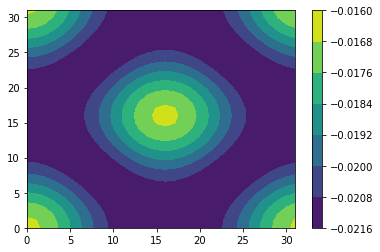

In [142]:
plt.contourf(w.data[20,:,1,1,1,1].reshape(32,32))
plt.colorbar()

In [150]:
from triqs_tprf.gw import gw_sigma_wk
sigma=gw_sigma_wk(**{"Wr_wk":w,"g_wk":g,"fft_flag":True})

g wk -> wr
g wr -> tr
W wk -> wr
W wr -> tr
sigma tr
sigma tr -> wr
sigma wr -> wk


In [174]:
gm = GfImFreq(indices = [0], beta = beta, name = "gm", n_points=2000)
g_pade = GfReFreq(window = (-7,7),n_points = 200,target_shape=(1,1))
g_pade.set_from_pade(sigma)

TypeError: Error: no suitable C++ overload found in implementation of function gf_fnt.set_from_pade

set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void 
 failed with the error : 
  Cpp2py converter: Python to C++ :
  ... Conversion of a gf from Python to C++ triqs::gfs::gf_view<triqs::gfs::imfreq, triqs::gfs::matrix_valued>
  ... Cannot convert the mesh of gf from Python type :  MeshProduct to the C++ type triqs::gfs::gf_mesh<triqs::gfs::imfreq>

set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void 
 failed with the error : 
  Cpp2py converter: Python to C++ :
  ... Conversion of a gf from Python to C++ triqs::gfs::gf_view<triqs::gfs::imfreq, triqs::gfs::matrix_valued>
  ... Cannot convert the mesh of gf from Python type :  MeshProduct to the C++ type triqs::gfs::gf_mesh<triqs::gfs::imfreq>

set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void 
 failed with the error : 
  Cpp2py converter: Python to C++ :
  ... Conversion of a gf from Python to C++ triqs::gfs::gf_view<triqs::gfs::imfreq, triqs::gfs::matrix_valued>
  ... Cannot convert the mesh of gf from Python type :  MeshProduct to the C++ type triqs::gfs::gf_mesh<triqs::gfs::imfreq>

set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void,set_from_pade(gf_view<refreq,matrix_valued> gw, gf_view<imfreq,matrix_valued> giw, int n_points, double freq_offset) -> void 
 failed with the error : 
  Cpp2py converter: Python to C++ :
  ... Conversion of a gf from Python to C++ triqs::gfs::gf_view<triqs::gfs::imfreq, triqs::gfs::matrix_valued>
  ... Cannot convert the mesh of gf from Python type :  MeshProduct to the C++ type triqs::gfs::gf_mesh<triqs::gfs::imfreq>


In [8]:
gm = GfImFreq(indices = [0], beta = beta, name = "gm", n_points=2000)
gm.data.shape

(4000, 1, 1)

In [13]:
gm=GfImFreq(mesh=imesh,data=g[(0,0)].data[:,0].reshape(-1,1,1),beta=50)
g_pade = GfReFreq(window = (-7,7),n_points = 200,target_shape=(1,1))
g_pade.set_from_pade(gm)

In [14]:
g_pade.set_from_pade(gm)

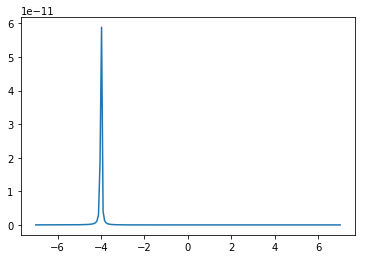

In [19]:
plt.plot(np.linspace(-7,7,200),-1*g_pade.data.flatten().imag)

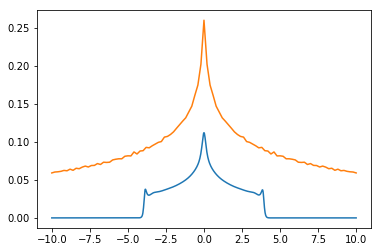

In [125]:
from pytriqs.lattice.tight_binding import dos
e_k = H.on_mesh_brillouin_zone(n_k = (51, 51, 1))

mu=0;npts=1000;beta=30;n_iw=500
imesh=MeshImFreq(beta, 'Fermion', n_iw)
g=lattice_dyson_g0_wk(mu, e_k,imesh)
gm=GfImFreq(mesh=imesh,data=g[(0,0)].data.mean(axis=1).reshape(-1,1,1),beta=beta)
g_pade = GfReFreq(window = (-10,10),n_points = npts,target_shape=(1,1))
g_pade.set_from_pade(gm)
y=-1*g_pade.data.flatten().imag/2*np.pi
y/=np.linalg.norm(y)
plt.plot(np.linspace(-10,10,npts),y)

a=dos(H.tb, n_kpts= 500, n_eps = 101, name = 'dos')
y=a[0].rho
y/=np.linalg.norm(y)
plt.plot(np.linspace(-10,10,a[0].rho.shape[0]),y)
plt.show()

(2050, 1, 1)

In [3]:
import numpy as np
from math import pi
%matplotlib inline
from pytriqs.plot.mpl_interface import plt,oplot
# change scale of all figures to make them bigger
import matplotlib as mpl

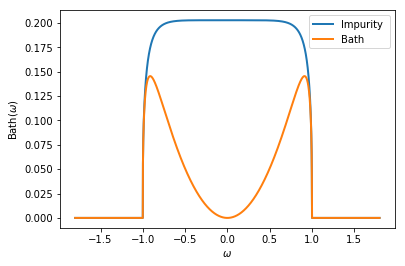

In [12]:
from pytriqs.gf import *

eps_d, V  = 0.0, 1
g = GfReFreq(indices = ['s','d'], window = (-2, 2), name = "s+d")
g['d','d'] << Omega - eps_d
g['d','s'] << V
g['s','d'] << V
g['s','s'] << inverse( Flat(1.0) )
g.invert()
oplot( -g['d','d'].imag/pi, '-', lw=2, x_window  = (-1.8,1.8), name = "Impurity" )
oplot( -g['s','s'].imag/pi, '-', lw=2, x_window  = (-1.8,1.8), name = "Bath" )

(-3.5, 0.1)

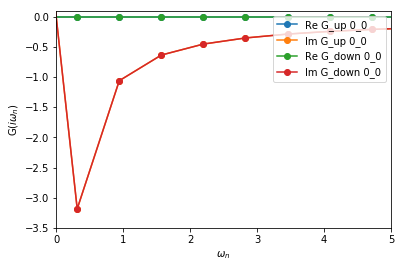

In [8]:
g_up = GfImFreq(indices=[0], beta=10)
g_down = GfImFreq(indices=[0], beta=10)
G = BlockGf(name_list=['up', 'down'], block_list=[g_up, g_down])

# Loop over the blocks
for name, g in G:
    g << inverse(iOmega_n)

oplot(G, '-o')
plt.xlim(0,5)
plt.ylim(-3.5,0.1)

Text(0.5,1,'Contourplot of the dispersion relation')

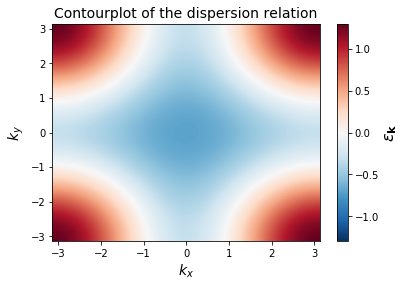

In [25]:
# Parameters
t = 0.25
tp = -0.3*t
U = 10.*t
beta = 200./(4*t)
mu = 0.6155 # Corresponds to a doping of 0.04

# Get the dispersion over the BZ
k_linear = np.linspace(-np.pi, np.pi, 1000, endpoint=False)
kx, ky = np.meshgrid(k_linear, k_linear)
epsk = -2 * t * (np.cos(kx) + np.cos(ky)) - 4 * tp * np.cos(kx) * np.cos(ky)

plt.pcolormesh( k_linear, k_linear, epsk, cmap='RdBu_r', vmin=-1.3, vmax=1.3)
plt.colorbar().set_label(r'$\epsilon_\mathbf{k}$', fontsize=16)
plt.xlabel('$k_x$', fontsize=14)
plt.ylabel('$k_y$', fontsize=14)
plt.title("Contourplot of the dispersion relation", fontsize = 14)

In [46]:
mw=MeshReFreq(-5,5, 201)
eta=1e-2
G_w = GfReFreq(mesh=mw, indices=[0,1])
G_w << inverse(iOmega_n-e_k+eta*1j)

AssertionError: Can not subtract two Gf with meshes of different type